In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dataset directions
Dataset_max_len_Padded_dir = r'D:\Animation\HWs\02\Dataset_max_len_Padded.npy'

In [3]:
# Loading dataset
Dataset = np.load(Dataset_max_len_Padded_dir)
print('Shape of dataset: ' + str(Dataset.shape))

Shape of dataset: (215, 35, 48)


In [4]:
# Global variables
videos_len = Dataset[-1, 0, 0].astype(int) + 1
actors_len = Dataset[-1, 0, 1].astype(int) + 1
action_classes = ['wave', 'drink from bottle', 'answer phone', 'clap', 'tight lace', 'sit down', 'stand up', 'read watch', 'bow']

In [5]:
# Determine length of videos
vid_len = Dataset.shape[1]

In [6]:
# Define Labels array
y_actions = np.zeros(Dataset.shape[0])
y_actors = np.zeros(Dataset.shape[0])
for vid_index in range(Dataset.shape[0]):
    y_actions[vid_index] = Dataset[vid_index, 0, 2]
    y_actors[vid_index] = Dataset[vid_index, 0, 1]

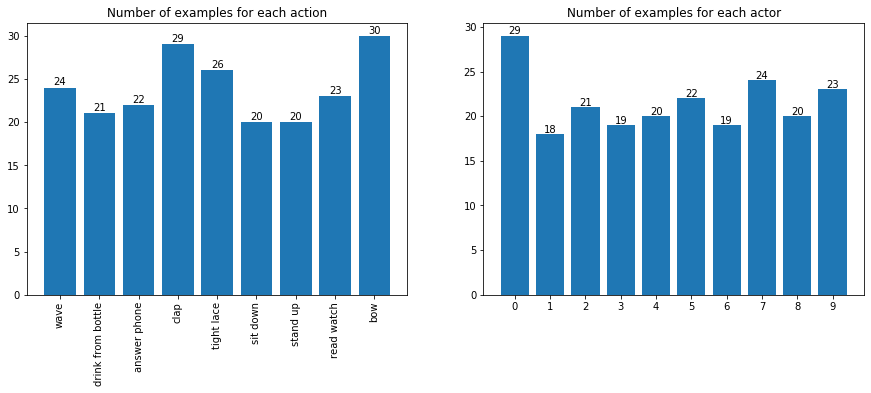

In [7]:
# Show how many examples exist for each activity and person
num_actions = np.bincount(y_actions.astype(int))
num_actors = np.bincount(y_actors.astype(int))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x = np.arange(num_actions.shape[0])
plt.bar(x, num_actions, align='center')
plt.xticks(x, action_classes, rotation=90)
plt.title('Number of examples for each action')
for i in range(num_actions.shape[0]):
    plt.annotate(str(num_actions[i]), xy=(x[i], num_actions[i]+0.3), ha='center')
    
plt.subplot(1,2,2)
x = np.arange(num_actors.shape[0])
plt.bar(x, num_actors, align='center')
plt.xticks(x, x)
plt.title('Number of examples for each actor')
for i in range(num_actors.shape[0]):
    plt.annotate(str(num_actors[i]), xy=(x[i], num_actors[i]+0.2), ha='center')
plt.show()

In [8]:
# Transform labels to one-hot (categorical)
from keras.utils import to_categorical

y_actions_cat = to_categorical(y_actions)
print('Shape of categorical-labels: ' + str(y_actions_cat.shape))

Using TensorFlow backend.


Shape of categorical-labels: (215, 9)


In [9]:
# Define X
X = Dataset[:, :, 3:]
print('Shape of X: ' + str(X.shape))

Shape of X: (215, 35, 45)


In [10]:
# Train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_actions_cat, test_size=0.1, random_state=10, stratify=y_actions_cat)

In [11]:
# Flatten X for giving to Dense classifier
X_train_flt = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test_flt = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
print('Shape of X_train_flatten: ' + str(X_train_flt.shape))
print('Shape of X_test_flatten: ' + str(X_test_flt.shape))

Shape of X_train_flatten: (193, 1575)
Shape of X_test_flatten: (22, 1575)


In [12]:
# Fully-connrcted Classifier
from keras import layers, models

model=models.Sequential()

model.add(layers.Dense(512, input_dim=1575, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(9, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               806912    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 585       
Total params: 840,329
Trainable params: 840,329
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compiling model
from keras import optimizers

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
# Fitting and trainig model
history = model.fit(X_train_flt, y_train, epochs=100, batch_size=64, validation_split=0.1)

Train on 173 samples, validate on 20 samples
Epoch 1/100
173/173 [==============================] - 1s 4ms/step - loss: 2.3910 - acc: 0.1098 - val_loss: 2.2023 - val_acc: 0.1500
Epoch 2/100
173/173 [==============================] - 0s 144us/step - loss: 2.2202 - acc: 0.1445 - val_loss: 2.0871 - val_acc: 0.3000
Epoch 3/100
173/173 [==============================] - 0s 150us/step - loss: 2.1748 - acc: 0.1676 - val_loss: 2.0487 - val_acc: 0.3000
Epoch 4/100
173/173 [==============================] - 0s 156us/step - loss: 2.1185 - acc: 0.2023 - val_loss: 2.0031 - val_acc: 0.3500
Epoch 5/100
173/173 [==============================] - 0s 156us/step - loss: 2.0917 - acc: 0.2775 - val_loss: 1.9938 - val_acc: 0.3500
Epoch 6/100
173/173 [==============================] - 0s 158us/step - loss: 2.0486 - acc: 0.3006 - val_loss: 1.9563 - val_acc: 0.4500
Epoch 7/100
173/173 [==============================] - 0s 160us/step - loss: 2.0398 - acc: 0.2832 - val_loss: 1.9352 - val_acc: 0.3500
Epoch 8/100


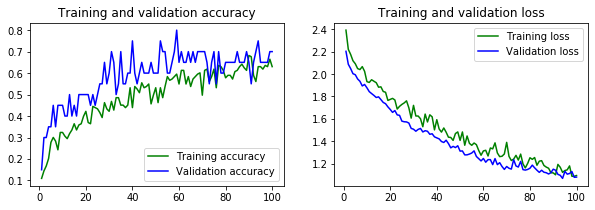

In [16]:
# Show curves of loss and accuracy during training
accuracy=history.history['acc']
validation_accuracy=history.history['val_acc']
loss=history.history['loss']
validation_loss=history.history['val_loss']
epochs=range(1, len(accuracy)+1)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# Evaluate model on data
score=model.evaluate(X_test_flt, y_test, batch_size=64)
print(score)

22/22 [==============================] - 0s 593us/step
[1.2833647727966309, 0.6363636255264282]


In [18]:
# Get the predictions from model
preds = model.predict(X_test_flt)

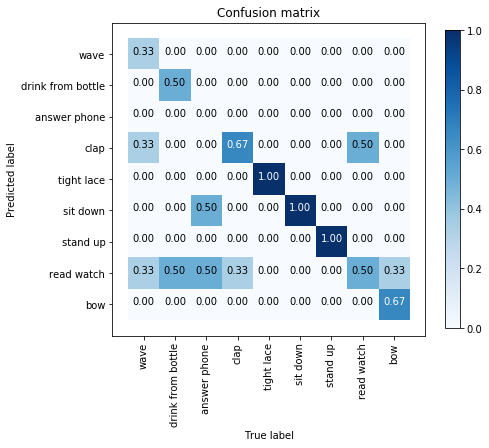

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

conf_mtx = confusion_matrix(np.argmax(preds, axis=1), np.argmax(y_test, axis=1))
conf_mtx = conf_mtx / conf_mtx.sum(axis=0)

plt.figure(figsize=(7,7))
plt.imshow(conf_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar(shrink=.7)
tick_marks = np.arange(len(action_classes))
plt.xticks(tick_marks, action_classes, rotation=90)
plt.yticks(tick_marks, action_classes)
fmt = '.2f'
thresh = conf_mtx.max() / 2.
for i, j in itertools.product(range(conf_mtx.shape[0]), range(conf_mtx.shape[1])):
    plt.text(j, i, format(conf_mtx[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_mtx[i, j] > thresh else "black")
        
plt.tight_layout()
plt.axis([-1,9,9,-1])
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [20]:
# Mean accuracy
np.mean(np.diag(conf_mtx))

0.6296296296296297